In [2]:
library(Seurat)
library(tidyverse)
library(foreach)
library(doParallel)
library(ggpubr)
source("/shareb//zliu//analysis/hires_gastrulation/CHARMtools/Rlibs/plotFun.R")
library(ComplexHeatmap)
options(bedtools.path = "~/miniconda3/envs/py3/bin")
library(bedtoolsr)
options(scipen=999)

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘foreach’


The followin

# UMAP related

In [3]:
celltypeColors = c(
"mitosis"="#bebebe","blood"="#ff9400",
"ExE endoderm"="#fec44f", "ExE ectoderm"="#cab2d6", 
"epiblast and PS"="#addd8e",
#neural
"neural ectoderm"="#AECBE6","NMP"="#96B9DB","neural tube"="#7EA8D0","notochord"="#6696C6","radial glias"="#4F85BB","oligodendrocytes and progenitors"="#3773B1","early neurons"="#1F62A6","schwann cell precursors"="#08519C",
#mesodermal
"early mesoderm"="#FC9272","ExE mesoderm"="#EF7F64","early mesenchyme"="#E36C57","intermediate mesoderm"="#D6594A", "myocytes"="#CA473C","mix late mesenchyme"="#BD342F",
"endoderm"="#fe9929","epithelial cells"="#fa9fb5"
)
cellcyclecolors = c("G0"="#762a83","G1"="#c2a5cf","Early-S"="#99d8c9","Mid-S"="#66c2a4","Late-S"="#41ae76","G2"="#238b45","M"="#ea6e34")


In [4]:
hires <- readRDS("/shareb/zliu/analysis/hires_mouse_dev/hires_mouse_emb_dev.new.rds")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


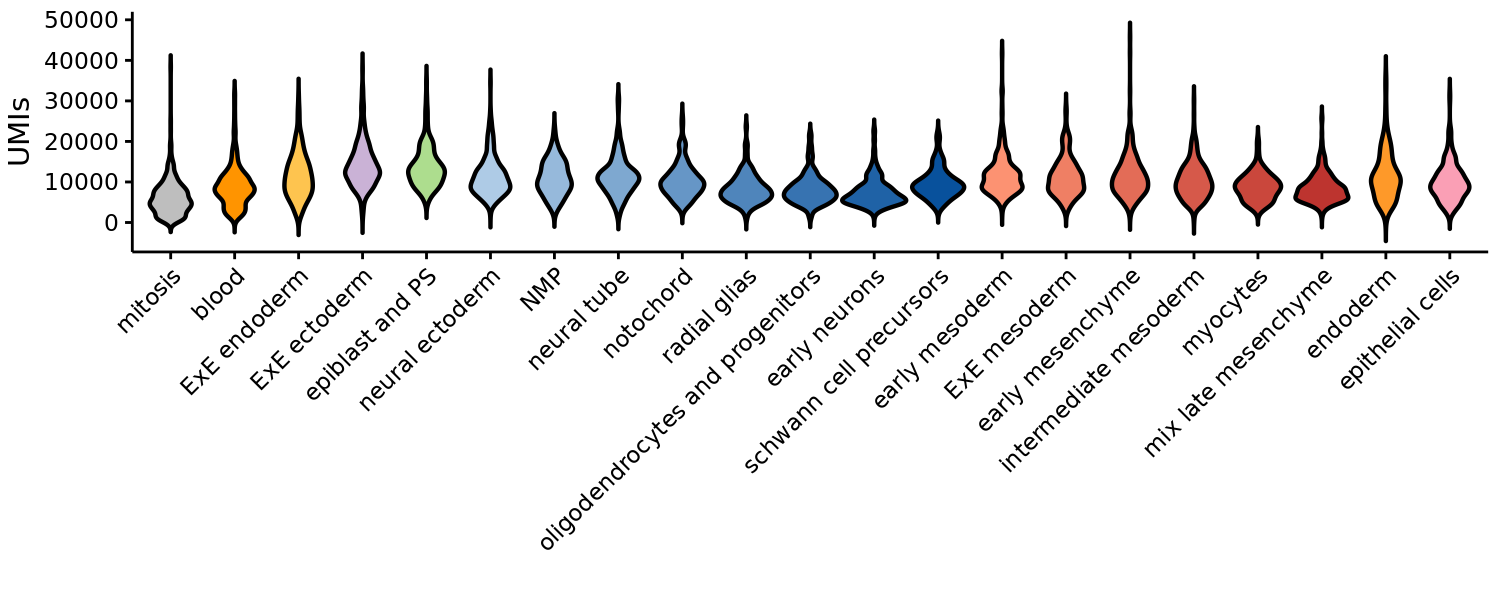

In [5]:
options(repr.plot.width=5, repr.plot.height=2,repr.plot.res = 300) 
#hires[[]] %>% mutate(type = ifelse(celltype == "mitosis"))
p <- ggviolin(hires[[]],x="celltype",y="UMIs_gene",fill = "celltype",palette = celltypeColors,order = names(celltypeColors))+
     theme_Publication() + NoLegend()+
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + xlab("") + ylab("UMIs") 
p

In [6]:
p%>% ggsave(filename = "M_umis.pdf",dpi = 300,height = 2,width = 5)

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


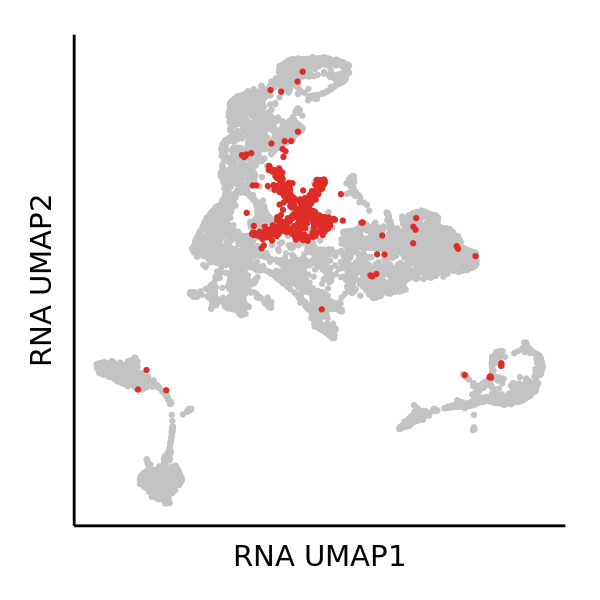

In [7]:
options(repr.plot.width=2, repr.plot.height=2,repr.plot.res = 300) 
p <- DimPlot(hires,cells.highlight = WhichCells(hires,expression = celltype == "mitosis"),pt.size = 0.05,reduction = "umap",sizes.highlight = 0.05) +
    theme_Publication() + NoLegend()  + 
    xlab("RNA UMAP1") + ylab("RNA UMAP2")+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank())
p
p %>% ggsave(filename = "highlight_mitosis.pdf",height = 1.5,width = 1.5,dpi = 300, units = "in") 

In [8]:
hires

An object of class Seurat 
146876 features across 7469 samples within 6 assays 
Active assay: scab (2405 features, 0 variable features)
 5 other assays present: RNA, SCT, cpg, cpggene, cdps
 13 dimensional reductions calculated: pca, umap, cpgpca, cpgumap, schicluster, schiclusterumap, cdpspca, cdpsumap, bandnorm, bandnorm_umap, cpg_umap, scabpca, scabumap

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


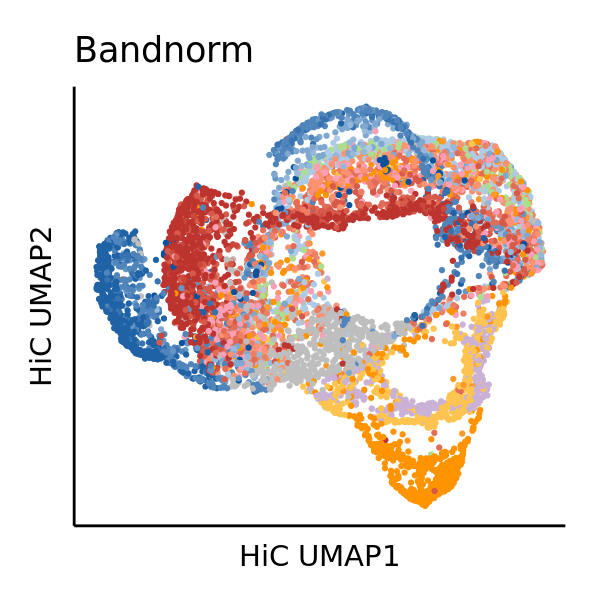

In [9]:
options(repr.plot.width=2, repr.plot.height=2,repr.plot.res = 300) 
p <- DimPlot(hires,pt.size = 0.05,reduction = "bandnorm_umap",sizes.highlight = 0.05,cols = celltypeColors,group.by = "celltype") +
    theme_Publication() + NoLegend()  + 
    xlab("HiC UMAP1") + ylab("HiC UMAP2")+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + ggtitle("Bandnorm")
p
p %>% ggsave(filename = "bandnorm.pdf",height = 1.5,width = 1.5,dpi = 300, units = "in") 

In [61]:
p <- DimPlot(hires,pt.size = 0.05,reduction = "cpg_umap",sizes.highlight = 0.05,cols = celltypeColors,group.by = "celltype") +
    theme_Publication() + NoLegend()  + 
    xlab("HiC UMAP1") + ylab("HiC UMAP2")+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + ggtitle("scAB")
p %>% ggsave(filename = "cpg.pdf",height = 1.5,width = 1.5,dpi = 300, units = "in") 

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


In [74]:
a <- DimPlot(hires,cells.highlight = WhichCells(hires,expression = celltype == "oligodendrocytes and progenitors"),pt.size = 0.05,reduction = "schiclusterumap",sizes.highlight = 0.05) +
    theme_Publication() + NoLegend()  + 
    xlab("Hi-C UMAP1") + ylab("Hi-C UMAP2")+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank())

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


In [75]:
b <- DimPlot(hires,cells.highlight = WhichCells(hires,expression = celltype == "mix late mesenchyme"),pt.size = 0.05,reduction = "schiclusterumap",sizes.highlight = 0.05) +
    theme_Publication() + NoLegend()  + 
    xlab("Hi-C UMAP1") + ylab("Hi-C UMAP2")+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank())

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


In [73]:
c <- DimPlot(hires,cells.highlight = WhichCells(hires,expression = celltype == "intermediate mesoderm"),pt.size = 0.05,reduction = "schiclusterumap",sizes.highlight = 0.05) +
    theme_Publication() + NoLegend()  + 
     xlab("Hi-C UMAP1") + ylab("Hi-C UMAP2")+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank())


Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


In [77]:
options(repr.plot.width = 6,repr.plot.height=2,repr.plot.res=300)
(a | b | c)  %>% ggsave(filename = "seperate.pdf",height = 1.5,width = 4.5,dpi = 300, units = "in") 

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


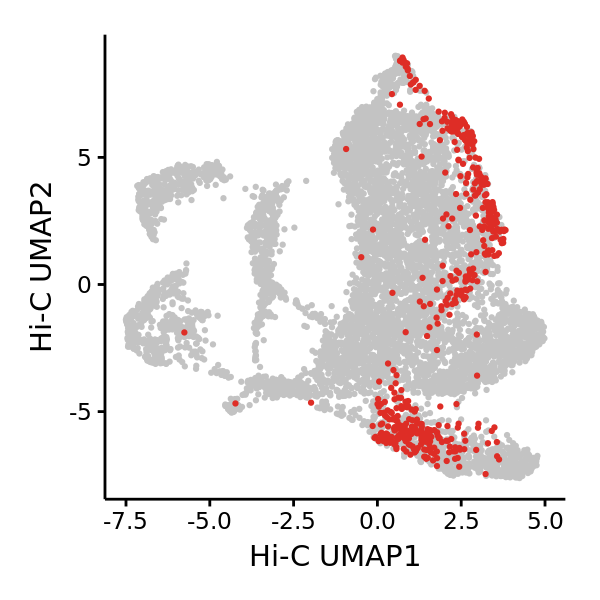

In [80]:
options(repr.plot.width = 2,repr.plot.height=2,repr.plot.res=300)
DimPlot(hires,cells.highlight = WhichCells(hires,expression = celltype == "radial glias"),pt.size = 0.05,reduction = "schiclusterumap",sizes.highlight = 0.05) +
    theme_Publication() + NoLegend()  + 
     xlab("Hi-C UMAP1") + ylab("Hi-C UMAP2")#+ theme(axis.ticks.x = element_blank(),
        #axis.text.x = element_blank(),
         #axis.ticks.y = element_blank(),
         # axis.text.y = element_blank())

In [91]:
twotypes <- cbind(hires@reductions$schiclusterumap@cell.embeddings,hires[[]] %>% select(cellname,celltype)) %>%
    filter(celltype == "radial glias") %>% mutate(type = ifelse(schiclusterumap_2 > -2.5,"scell","G1cell")) 


In [10]:
DefaultAssay(hires) <- "SCT"
Idents(hires) <- hires$celltype

In [109]:
deg_rg <- FindMarkers(hires[["SCT"]],`cells.1` = twotypes%>% filter(type=="scell") %>% pull(cellname),
                `cells.2` = twotypes%>% filter(type=="G1cell") %>% pull(cellname))

In [115]:
deg_rg %>% filter(p_val_adj < 0.01)  %>% rownames_to_column("gene") %>% select(gene) %>%  write_tsv("rg_cc_deg.txt",col_names = FALSE)

In [116]:
# genelist were use in online resoucese metascape

# Cellcycle related

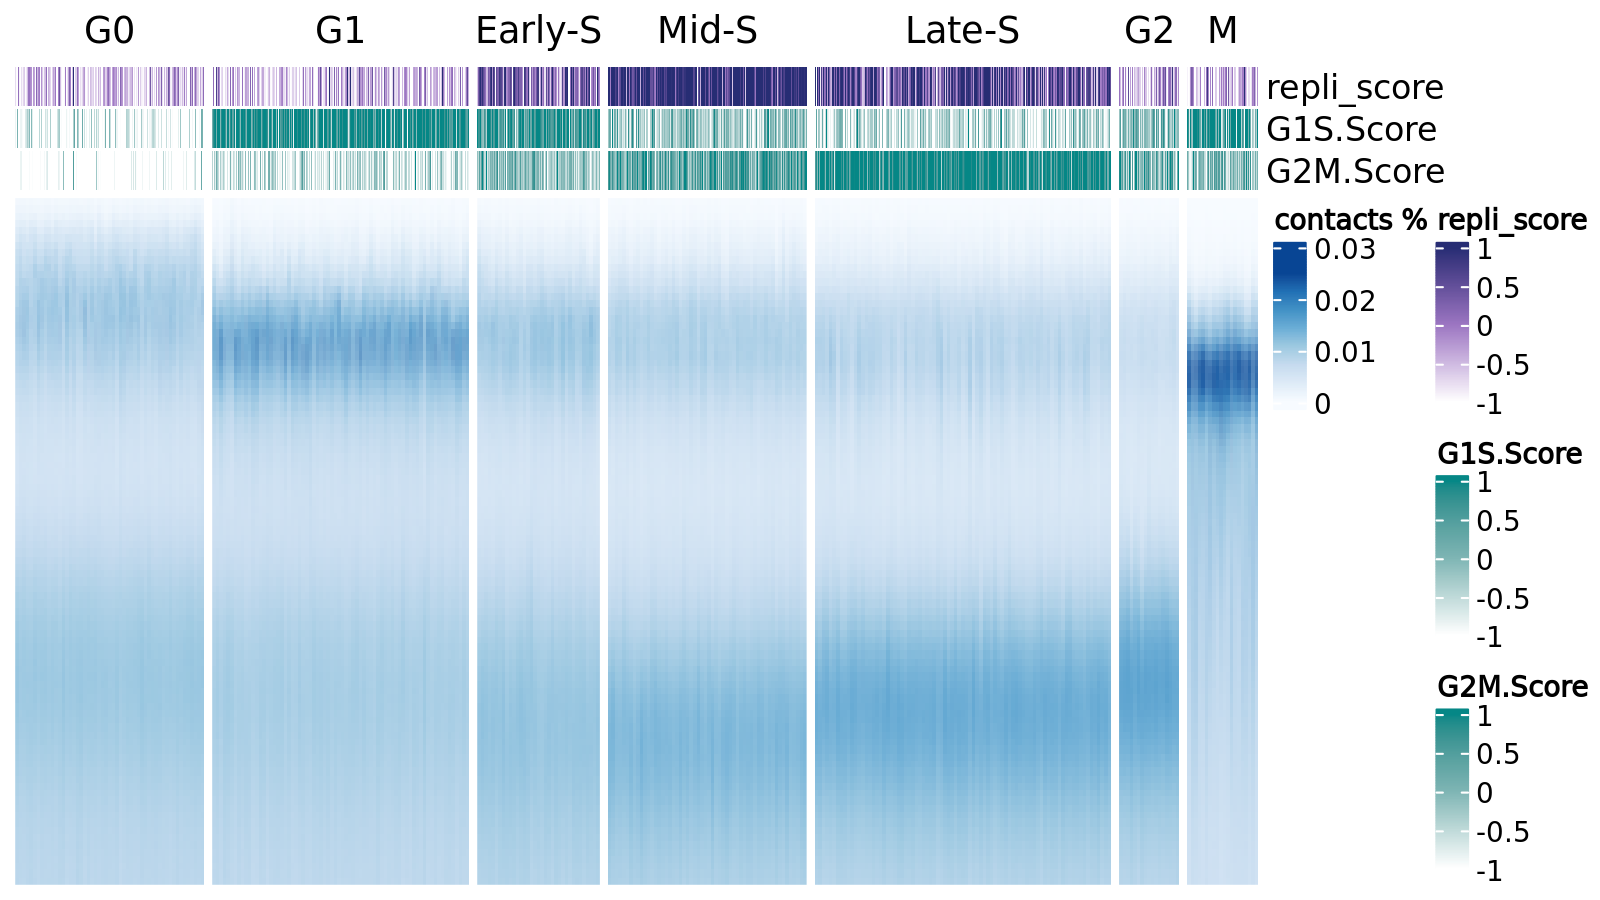

In [133]:
mat <- t(hires[["cdps"]]@data %>% as.matrix() )
set.seed(42)
colors <-c("#f7fbff","#deebf7","#c6dbef","#9ecae1","#6baed6","#4292c6","#2171b5","#084594")
tempOrderDF <- hires[[]] #%>% filter(celltype == "early mesoderm")
#order cells by cluster
tempOrderDF$cellcycle_threshold <- factor(tempOrderDF$cellcycle_threshold ,levels=c("G0","G1","Early-S","Mid-S","Late-S","G2","M"))
tempOrderDF <- tempOrderDF[sample(1:nrow(tempOrderDF)), ] #%>% arrange(desc(mitotic_p))
#addjust color scale

heatmap_mat <- mat[tempOrderDF  %>% pull(cellname),] %>% t() %>% as.data.frame

names(heatmap_mat) <- tempOrderDF %>%  pull(cellname)
heatmap_mat[heatmap_mat > 0.025] <- 0.025

library(circlize)
col_fun = colorRamp2(c(-1, 0, 1), c("#ffffff", "#9c76c2", "#272d74"))
col_fun1 = colorRamp2(c(-1, 0, 1), c("#ffffff","#7eb5b4","#058786"))

Annodf <- tempOrderDF %>% select(repli_score,G1S.Score,G2M.Score,sub_k_cluster,cluster,cellname,cellcycle_threshold)
Annodf <- Annodf %>% group_by(cellcycle_threshold)# %>% mutate(repli_score=mean(repli_score),G1S.Score=mean(G1S.Score),G2M.Score=mean(G2M.Score))
topAnno <- HeatmapAnnotation(df=Annodf %>% column_to_rownames("cellname")%>% select(repli_score,G1S.Score,G2M.Score) ,
                            col = list(repli_score = col_fun,G1S.Score = col_fun1,G2M.Score = col_fun1))

options(repr.plot.width=8,repr.plot.height=4.5,repr.plot.res=200)
p <- Heatmap(heatmap_mat%>% as.matrix(),cluster_rows = FALSE,cluster_columns = FALSE,col = colors,
       show_row_names = FALSE, show_column_names = FALSE,top_annotation= topAnno ,column_split= tempOrderDF %>% select(cellcycle_threshold),use_raster=TRUE,
        heatmap_legend_param = list(title = "contacts %")) #%>% suppressMessages()
p

In [134]:
pdf(paste0("cdpsheatmap.pdf"), width = 8, height = 4.5)
draw(p)
dev.off()

png 
  2

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


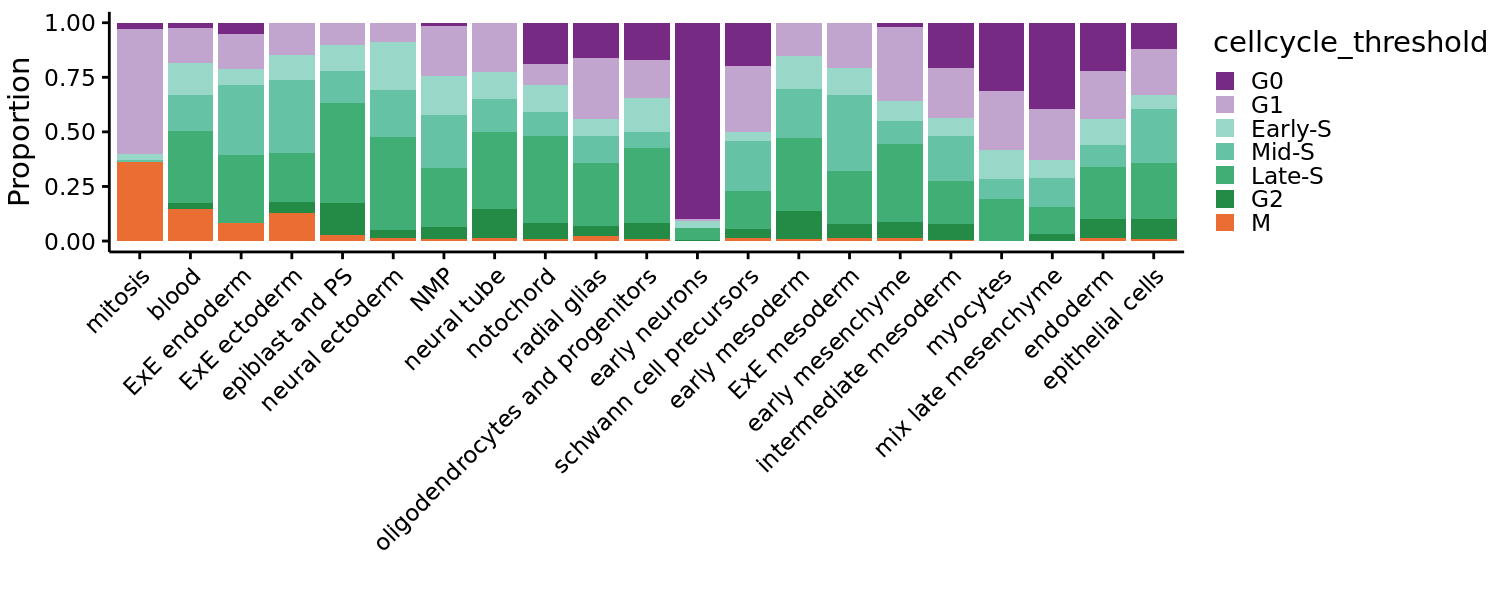

In [158]:
tempData <- hires[[]]# %>% filter(cellcycle_threshold != "G0") 
tempData$cellcycle_threshold <- factor(tempData$cellcycle_threshold,levels = c("G0","G1","Early-S","Mid-S","Late-S","G2","M"))
#tempData$cellcycle_threshold<-reorder(tempData$cellcycle_threshold, t$cycle_complexity,FUN=function(x) mean(as.numeric(x)))
options(repr.plot.width=5, repr.plot.height=2,repr.plot.res = 300) 
tempData$celltype <- factor(tempData$celltype, levels = names(celltypeColors))
p <- tempData %>% ggplot() + geom_bar(aes(x=celltype,fill=cellcycle_threshold),position="fill") + scale_fill_manual(values=cellcyclecolors)+
theme_Publication() + #NoLegend()+
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + xlab("") + ylab("Proportion") + theme(legend.position = "right",legend.direction = "vertical")
p

In [159]:
p %>% ggsave(filename = "cellcycle_propotion.pdf",height = 2,width = 5,dpi = 300, units = "in") 

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


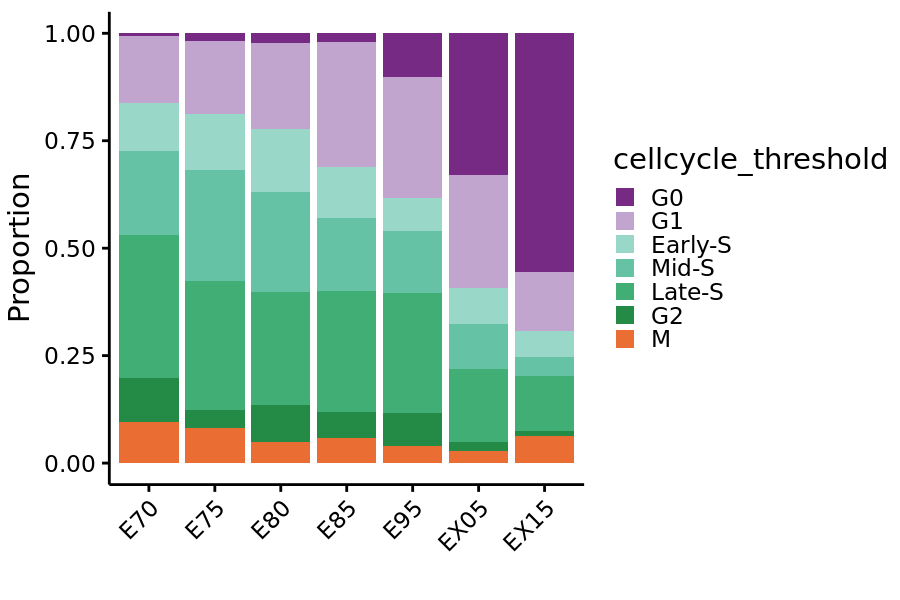

In [235]:
tempData <- hires[[]]# %>% filter(cellcycle_threshold != "G0") 
tempData$cellcycle_threshold <- factor(tempData$cellcycle_threshold,levels = c("G0","G1","Early-S","Mid-S","Late-S","G2","M"))
#tempData$cellcycle_threshold<-reorder(tempData$cellcycle_threshold, t$cycle_complexity,FUN=function(x) mean(as.numeric(x)))

options(repr.plot.width=3, repr.plot.height=2,repr.plot.res = 300) 
tempData$celltype <- factor(tempData$celltype, levels = names(celltypeColors))
p <- tempData %>% ggplot() + geom_bar(aes(x=stage,fill=cellcycle_threshold),position="fill") + scale_fill_manual(values=cellcyclecolors)+
theme_Publication() + #NoLegend()+
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + xlab("") + ylab("Proportion") + theme(legend.position = "right",legend.direction = "vertical")
p

In [236]:
p %>% ggsave(filename = "cellcycle_propotion_stage.pdf",height = 2,width = 2,dpi = 300, units = "in") 

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


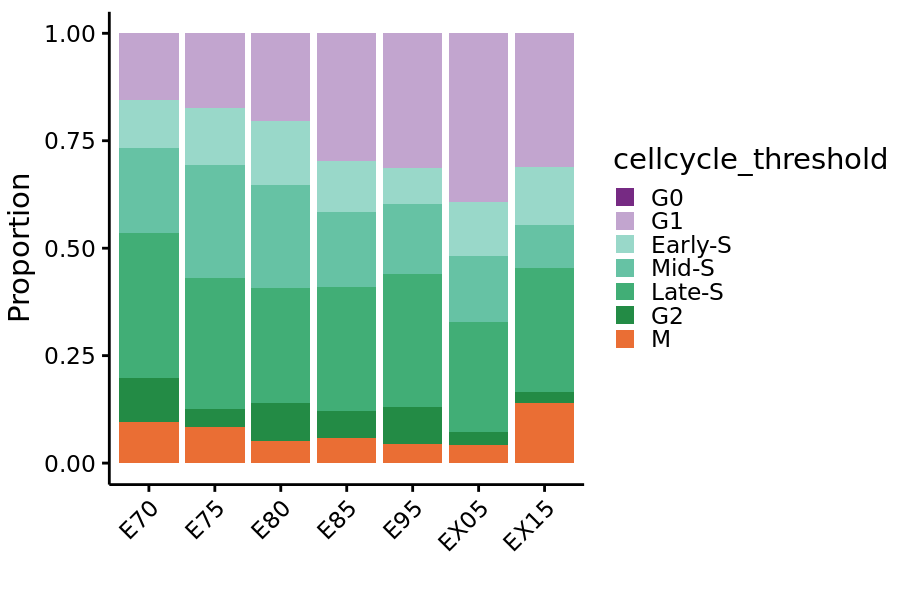

In [237]:
tempData <- hires[[]]# %>% filter(cellcycle_threshold != "G0") 
tempData$cellcycle_threshold <- factor(tempData$cellcycle_threshold,levels = c("G0","G1","Early-S","Mid-S","Late-S","G2","M"))
#tempData$cellcycle_threshold<-reorder(tempData$cellcycle_threshold, t$cycle_complexity,FUN=function(x) mean(as.numeric(x)))

options(repr.plot.width=3, repr.plot.height=2,repr.plot.res = 300) 
tempData$celltype <- factor(tempData$celltype, levels = names(celltypeColors))
p <- tempData%>% filter(cellcycle_threshold != "G0") %>% ggplot() + geom_bar(aes(x=stage,fill=cellcycle_threshold),position="fill") + scale_fill_manual(values=cellcyclecolors)+
theme_Publication() + #NoLegend()+
     theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + xlab("") + ylab("Proportion") + theme(legend.position = "right",legend.direction = "vertical")
p

In [238]:
p %>% ggsave(filename = "cellcycle_propotion_stage_noG0.pdf",height = 2,width = 3,dpi = 300, units = "in") 

Joining, by = "cellname"


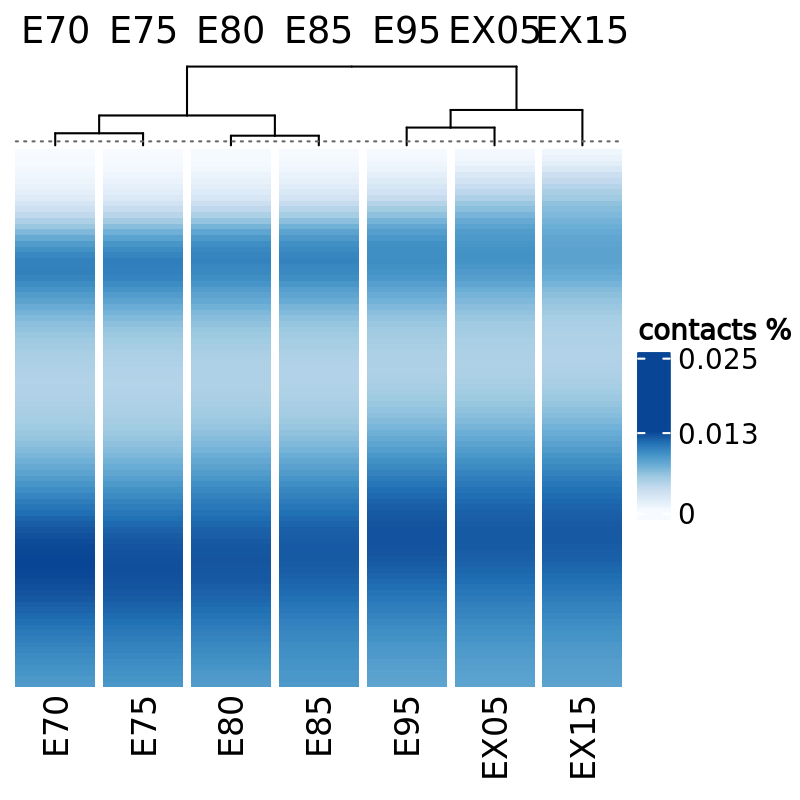

In [222]:
tempMat <- hires[[]] %>% filter(!cellcycle_threshold %in% c("M","G0"),celltype != "blood")%>% select(cellname,stage,cellcycle_threshold) %>%  
        group_by(stage) %>% select(-cellcycle_threshold) %>% left_join(mat %>% as.data.frame() %>% rownames_to_column("cellname")) %>% 
group_by(stage) %>% select(-cellname) %>% summarise_all(mean) %>% na.omit() %>% ungroup()
tempMat[is.na(tempMat)] <- 0
plotmat <- tempMat %>% column_to_rownames("stage") %>% t() 

#plotmat[plotmat > 0.025] <- 0.025

p <- Heatmap(plotmat,cluster_rows = FALSE,cluster_columns = TRUE,
   show_row_names = F, show_column_names = TRUE,col = colors,#column_split= as.data.frame(celltypeoder),
        column_dend_reorder = T,
     heatmap_legend_param = list(title = "contacts %", at = c(0, 0.013, 0.025), labels = c(0, 0.013, 0.025)),
                 column_split = c("E70","E75","E80","E85","E95","EX05","EX15")
   ) #%>% suppressMessages()

options(repr.plot.width=4,repr.plot.height=4,repr.plot.res=200)
p = draw(p)

In [227]:
rownames(b)[c(TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE)]

[1] "131072000.0"        "30048388.487730667" "6888623.433758429" 
[4] "1579223.8852177314" "362038.67196751235" "82997.73149766462"

In [ ]:
pdf(paste0("cdps_stage.pdf"), width = 4, height = 5)
draw(p)
dev.off()

png 
  2

In [ ]:
plots <- list()
for (celltype_i in hires[[]] %>% group_by(celltype) %>% summarise(count = n()) %>% arrange(desc(count)) %>% pull(celltype)){
    set.seed(42)
    colors <-c("#f7fbff","#deebf7","#c6dbef","#9ecae1","#6baed6","#4292c6","#2171b5","#084594")
    tempOrderDF <- hires[[]] %>% filter(celltype == celltype_i)
    #order cells by cluster
    tempOrderDF$cellcycle_threshold <- factor(tempOrderDF$cellcycle_threshold ,levels=c("G0","M","G1","Early-S","Mid-S","Late-S","G2"))
    tempOrderDF <- tempOrderDF[sample(1:nrow(tempOrderDF)), ]%>% arrange(cellcycle_threshold)
    #addjust color scale


    #new#
    tempOrderDF <- tempOrderDF %>% mutate(clusterOrder = str_replace(paste0(cluster,"_",sub_k_cluster),"_sub_",""))
    #order <- tempOrderDF %>% group_by(clusterOrder) %>% summarise(order = mean(order_index)) %>% arrange(desc(order)) %>% pull(clusterOrder) 
    order <- tempOrderDF %>% group_by(cellcycle_threshold,clusterOrder)
    order <- tempOrderDF %>% group_by(cellcycle_threshold,clusterOrder) %>% summarise(count = n(),mean_G1S = mean(G1S.Score),mean_farAvg = mean(farAvg),ind = mean(order_index),
                        mean_G2M = mean(G2M.Score),mean_repli = mean(repli_score),mean_nearp = mean(near_p),mean_mitotic_p = mean(mitotic_p)) %>%
                     mutate(order = ifelse(cellcycle_threshold%in% c("Mid-S"),mean_G2M,
                                          ifelse(cellcycle_threshold %in% c("Late-S","G2"),desc(mean_repli),
                                                ifelse(cellcycle_threshold %in% c("G1","G0"),mean_farAvg,
                                                      ifelse(cellcycle_threshold %in% c("Early-S","M","Unknown"),desc(mean_mitotic_p)))))) %>% arrange(cellcycle_threshold,order) %>% pull(clusterOrder)
    #order <-c('8_3','8_1','8_2','4_2','1_1','1_2','1_3','4_1','9_1','4_3','9_2','9_3','12_1','12_2','12_3','6_2','11_1','10_3','11_3','11_2','6_3','10_2','10_1','6_1','3_2','3_3','3_1','7_2','7_1','7_3','5_2','5_1','5_3','2_2','2_3','2_1')
    tempOrderDF$clusterOrder <- factor(tempOrderDF$clusterOrder,levels = order)
    #####


    heatmap_mat <- mat[tempOrderDF  %>% pull(cellname),] %>% t() %>% as.data.frame

    names(heatmap_mat) <- tempOrderDF %>%  pull(cellname)
    heatmap_mat[heatmap_mat > 0.025] <- 0.025

    library(circlize)
    col_fun = colorRamp2(c(-1, 0, 1), c("#ffffff", "#9c76c2", "#272d74"))
    col_fun1 = colorRamp2(c(-1, 0, 1), c("#ffffff","#7eb5b4","#058786"))

    Annodf <- tempOrderDF %>% select(repli_score,G1S.Score,G2M.Score,sub_k_cluster,cluster,cellname,cellcycle_threshold)
    Annodf <- Annodf %>% group_by(cellcycle_threshold) #%>% mutate(repli_score=mean(repli_score),G1S.Score=mean(G1S.Score),G2M.Score=mean(G2M.Score))
    topAnno <- HeatmapAnnotation(df=Annodf %>% column_to_rownames("cellname")%>% select(repli_score,G1S.Score,G2M.Score,cellcycle_threshold) ,
                                col = list(repli_score = col_fun,G1S.Score = col_fun1,G2M.Score = col_fun1,
                                           cellcycle_threshold= cellcyclecolors),show_annotation_name=FALSE)#,sub_k_cluster=c("1" = "#fc8d59", "2" = "#ffffbf", "3" = "#91bfdb")))

    options(repr.plot.width=5,repr.plot.height=3,repr.plot.res=200)
    p <- Heatmap(heatmap_mat%>% as.matrix(),cluster_rows = FALSE,cluster_columns = FALSE,col = colors,
           show_row_names = FALSE, show_column_names = FALSE,top_annotation= topAnno ,column_split= tempOrderDF %>% select(clusterOrder),use_raster=TRUE,
                 column_gap = unit(0.1, "mm"),column_title = celltype_i,
            heatmap_legend_param = list(title = "contacts %")) #%>% suppressMessages()
    if (length(plots)==0){
        plots <- p
    }else{
    plots <- plots + p
        }
}
#svg(qq(paste0("plots/order_earlymesoderm.svg")), width = 12, height = 6)
#draw(p,heatmap_legend_side = "right", annotation_legend_side = "left")
#dev.off()

#draw(plots,heatmap_legend_side = "right", annotation_legend_side = "left")

`summarise()` has grouped output by 'cellcycle_threshold'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cellcycle_threshold'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cellcycle_threshold'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cellcycle_threshold'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cellcycle_threshold'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cellcycle_threshold'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cellcycle_threshold'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cellcycle_threshold'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cellcycle_threshold'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cellcycle

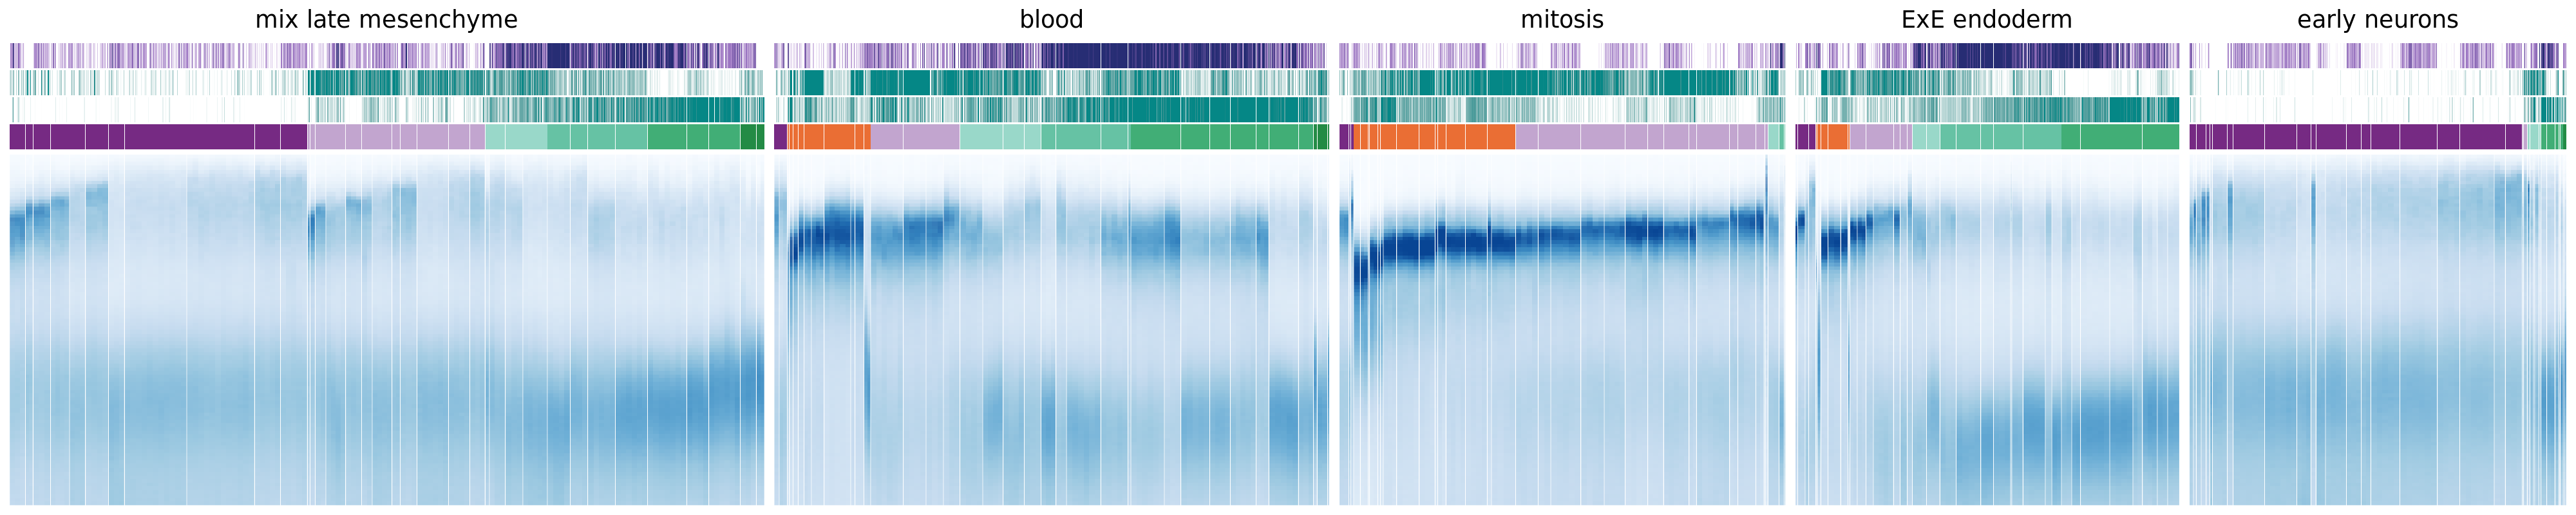

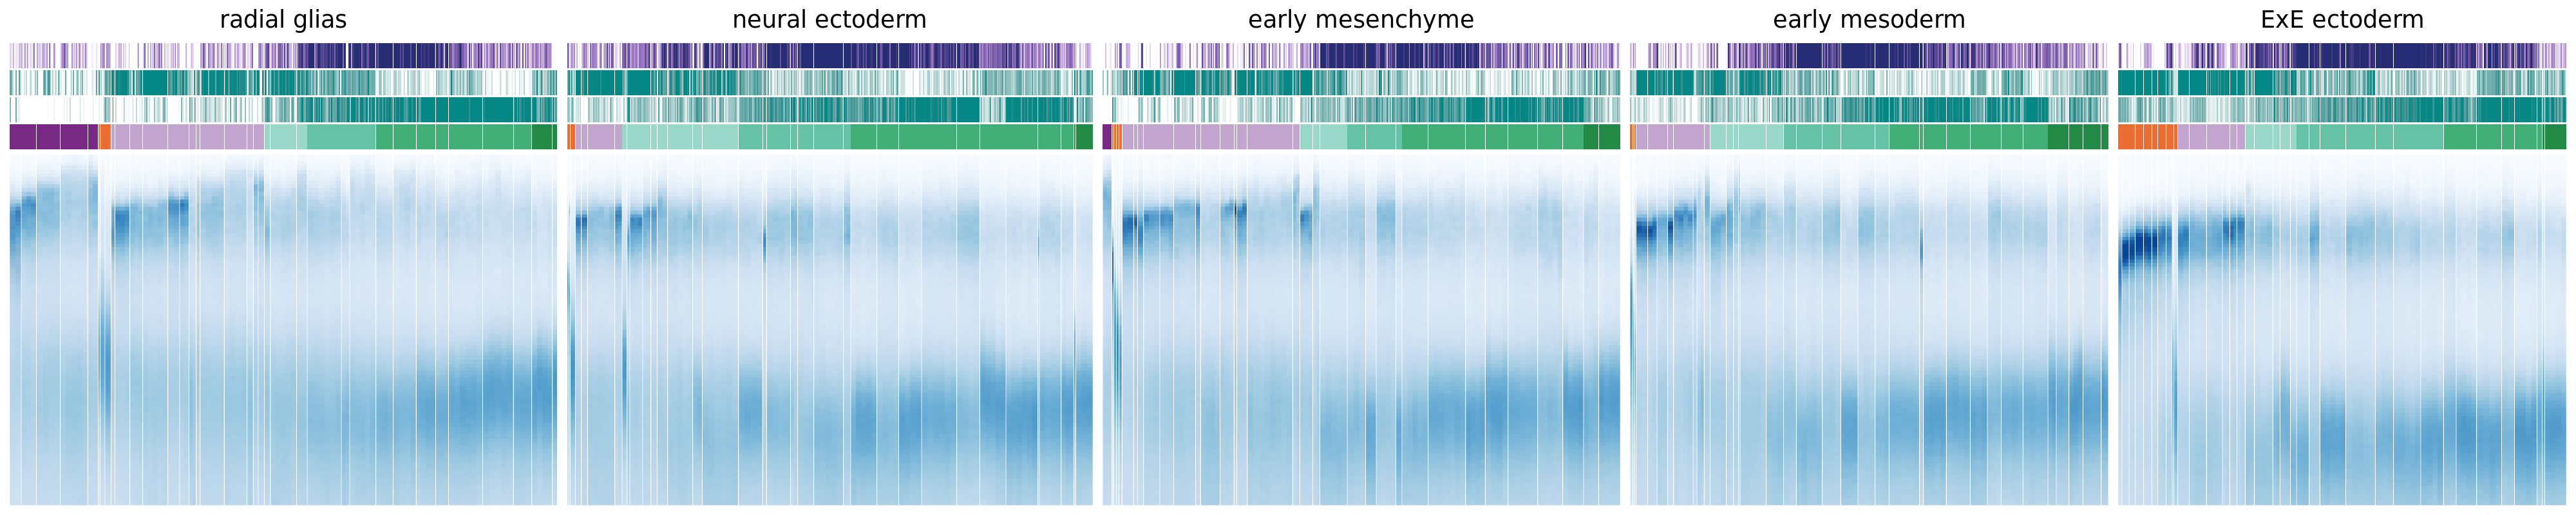

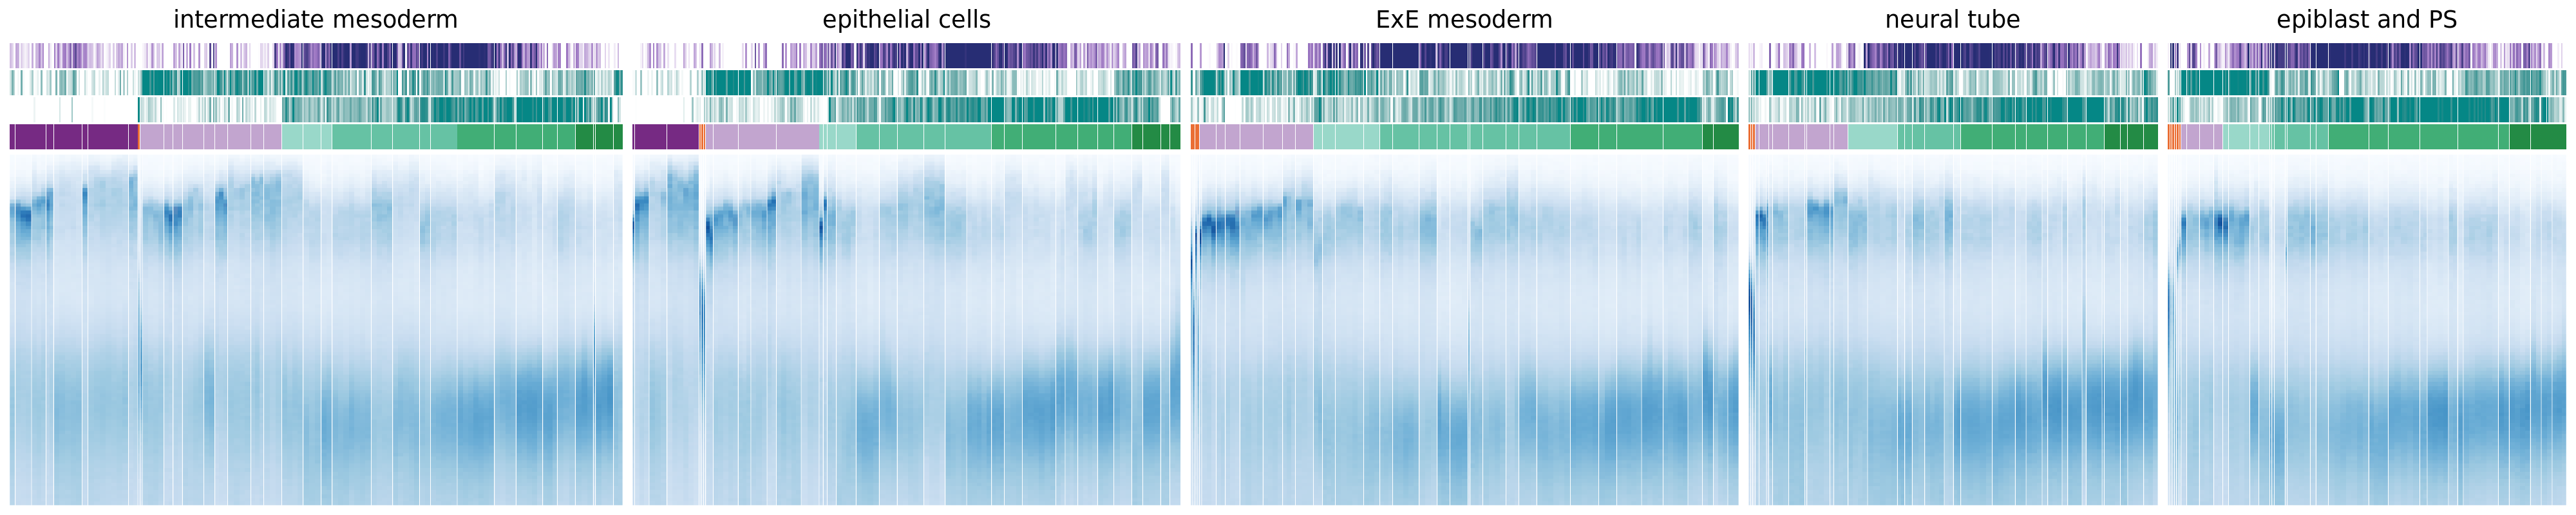

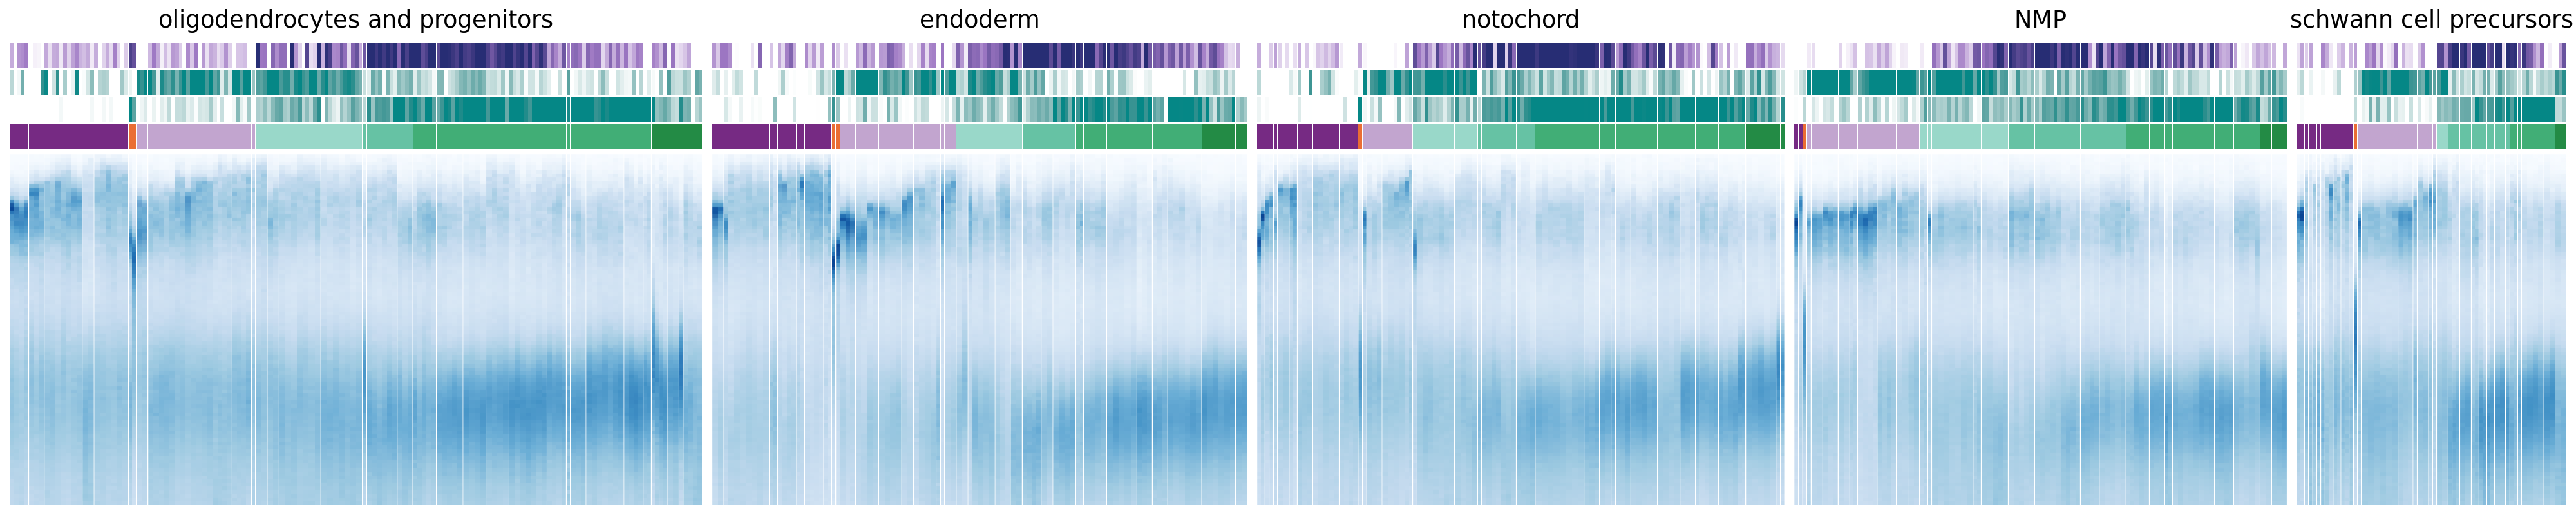

In [240]:
options(repr.plot.width=20,repr.plot.height=4,repr.plot.res=200)
draw(plots[,1:5], merge_legend = TRUE,show_heatmap_legend = FALSE)
draw(plots[,6:10], merge_legend = TRUE,show_heatmap_legend = FALSE)
draw(plots[,11:15], merge_legend = TRUE,show_heatmap_legend = FALSE)
draw(plots[,16:20],  merge_legend = TRUE,show_heatmap_legend = FALSE)

In [11]:
source("/shareb/zliu/analysis/hires_gastrulation/CHARMtools/Rlibs/plotFun.R")
source("/shareb/zliu/analysis/hires_gastrulation/CHARMtools/Rlibs/hires_utils.R")
source("/shareb/zliu/analysis/hires_gastrulation/CHARMtools/Rlibs/cellcycle_ana.R")
hires_cc <- subset(hires,subset = cellcycle_threshold %in% c("G1","Early-S","Mid-S","Late-S","G2"))


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attaching package: ‘DescTools’


The following object is masked from ‘package:foreach’:

    %:%


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from cpg_umap_ to cpgumap_”
Warning message:
“Cannot add objects with duplicate keys (offending key: cpgumap_) setting key to original value 'cpg_umap_'”


In [12]:
registerDoParallel(100)
shift_by_phase <- foreach(i = seq(1:4000),.combine = "rbind") %dopar% {
    es <- align_cellcycle(hires_cc,'stage == "EX15"','stage == "E95"',sample_number=300)[3][[1]] %>% filter(cellcycle_query == "Early-S") %>% pull(shift) %>% mean()
    ms <- align_cellcycle(hires_cc,'stage == "EX15"','stage == "E95"',sample_number=300)[3][[1]] %>% filter(cellcycle_query == "Mid-S") %>% pull(shift) %>% mean()
    ls <- align_cellcycle(hires_cc,'stage == "EX15"','stage == "E95"',sample_number=300)[3][[1]] %>% filter(cellcycle_query == "Late-S") %>% pull(shift) %>% mean()
    c(es,ms,ls)
}
shift_by_phase <- shift_by_phase %>% as_tibble()
names(shift_by_phase) <- c("Early-S","Mid-S","Late-S")

options(repr.plot.width=5,repr.plot.height=4,repr.plot.res=200)
a <- shift_by_phase %>% gather(phase,shift) %>% gghistogram(x="shift",bins= 50,fill = "phase",color= "phase",alpha = 0.1,add="mean") + 
    theme_Publication() + theme(legend.position = "right", legend.direction = "vertical")

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


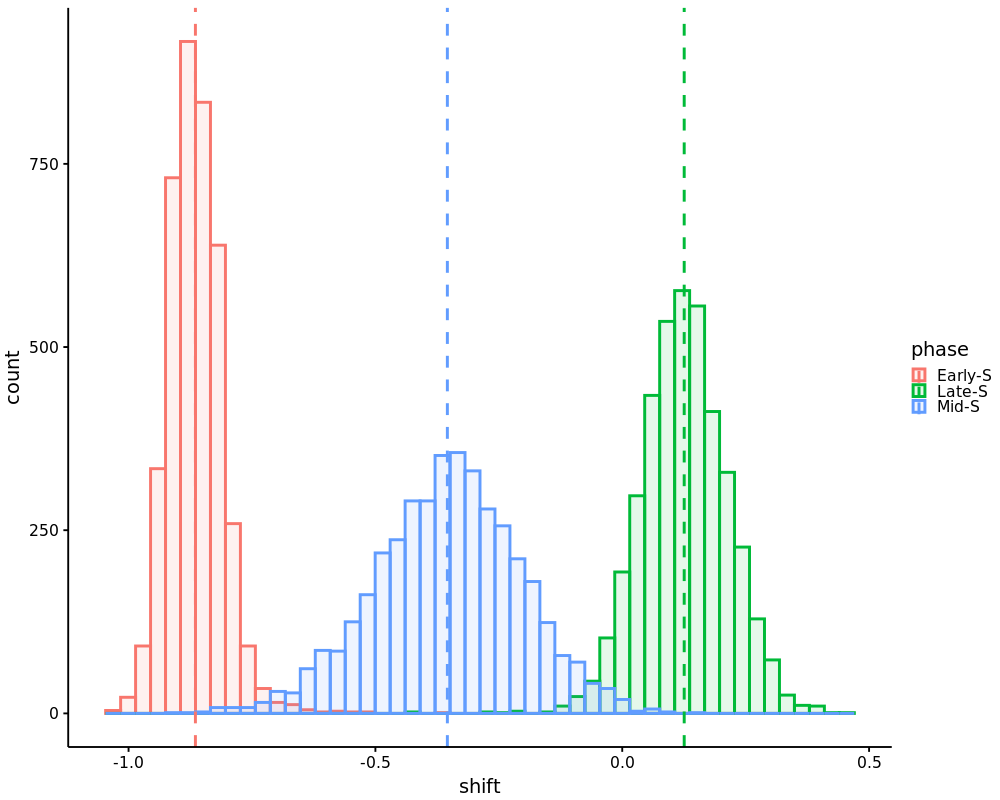

In [13]:
shift_by_phase1 <- foreach(i = seq(1:4000),.combine = "rbind") %dopar% {
    es <- align_cellcycle(hires_cc,'stage == "E75"','stage == "E95"',sample_number=300)[3][[1]] %>% filter(cellcycle_query == "Early-S") %>% pull(shift) %>% mean()
    ms <- align_cellcycle(hires_cc,'stage == "E75"','stage == "E95"',sample_number=300)[3][[1]] %>% filter(cellcycle_query == "Mid-S") %>% pull(shift) %>% mean()
    ls <- align_cellcycle(hires_cc,'stage == "E75"','stage == "E95"',sample_number=300)[3][[1]] %>% filter(cellcycle_query == "Late-S") %>% pull(shift) %>% mean()
    c(es,ms,ls)
}
shift_by_phase1 <- shift_by_phase1 %>% as_tibble()
names(shift_by_phase1) <- c("Early-S","Mid-S","Late-S")

options(repr.plot.width=5,repr.plot.height=4,repr.plot.res=200)
shift_by_phase1 %>% gather(phase,shift) %>% gghistogram(x="shift",bins= 50,fill = "phase",color= "phase",alpha = 0.1,add="mean") + 
    theme_Publication() + theme(legend.position = "right", legend.direction = "vertical")

In [14]:
shift_by_phase2 <- foreach(i = seq(1:4000),.combine = "rbind") %dopar% {
    es <- align_cellcycle(hires,'celltype!= "sample1" & stage == "E95"','celltype!= "sample2" & stage == "E95"',sample_number=300)[3][[1]] %>% filter(cellcycle_query == "Early-S") %>% pull(shift) %>% mean()
    ms <- align_cellcycle(hires,'celltype!= "sample1" & stage == "E95"','celltype!= "sample2" & stage == "E95"',sample_number=300)[3][[1]] %>% filter(cellcycle_query == "Mid-S") %>% pull(shift) %>% mean()
    ls <- align_cellcycle(hires,'celltype!= "sample1" & stage == "E95"','celltype!= "sample2" & stage == "E95"',sample_number=300)[3][[1]] %>% filter(cellcycle_query == "Late-S") %>% pull(shift) %>% mean()
    c(es,ms,ls)
}
shift_by_phase2 <- shift_by_phase2 %>% as_tibble()
names(shift_by_phase2) <- c("Early-S","Mid-S","Late-S")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


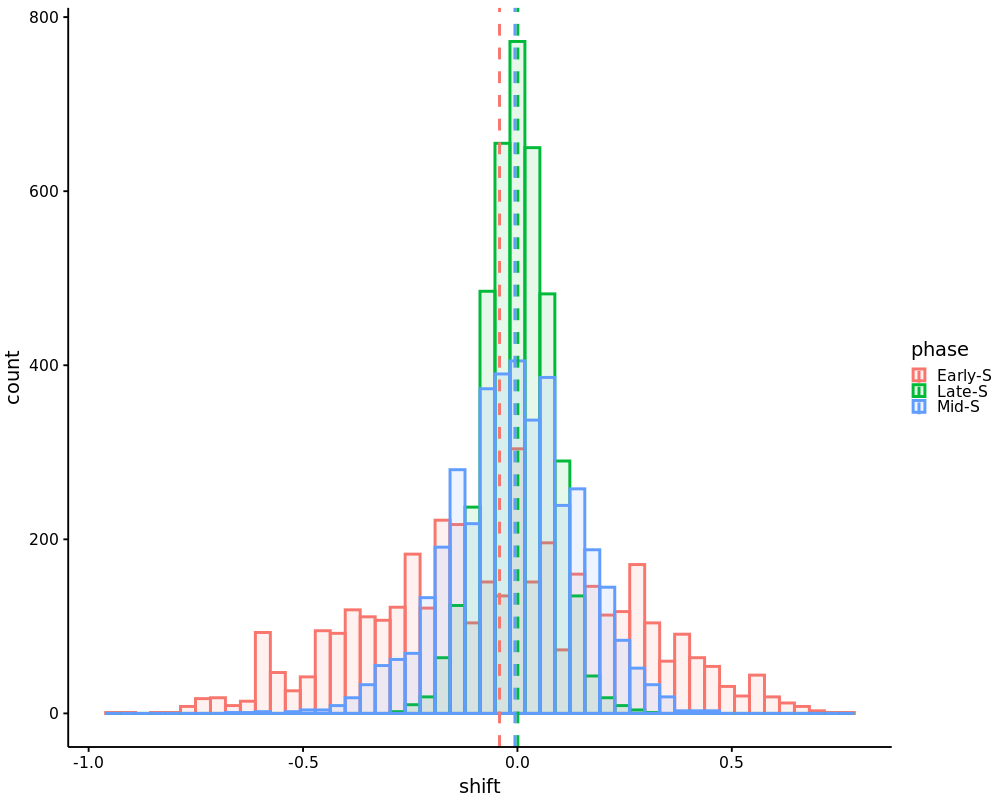

In [15]:
options(repr.plot.width=5,repr.plot.height=4,repr.plot.res=200)
shift_by_phase2 %>% gather(phase,shift) %>% gghistogram(x="shift",bins= 50,fill = "phase",color= "phase",alpha = 0.1,add="mean") + 
    theme_Publication() + theme(legend.position = "right", legend.direction = "vertical")

In [17]:
a <- shift_by_phase %>% gather(phase,shift) %>% gghistogram(x="shift",bins= 30,fill = "phase",color= "phase",alpha = 0.1,add="mean") + 
    theme_Publication() + theme(legend.position = "right", legend.direction = "vertical")
b <- shift_by_phase1 %>% gather(phase,shift) %>% gghistogram(x="shift",bins= 30,fill = "phase",color= "phase",alpha = 0.1,add="mean") + 
    theme_Publication() + theme(legend.position = "right", legend.direction = "vertical")
c <- shift_by_phase2 %>% gather(phase,shift) %>% gghistogram(x="shift",bins= 30,fill = "phase",color= "phase",alpha = 0.1,add="mean") + 
    theme_Publication() + theme(legend.position = "right", legend.direction = "vertical")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


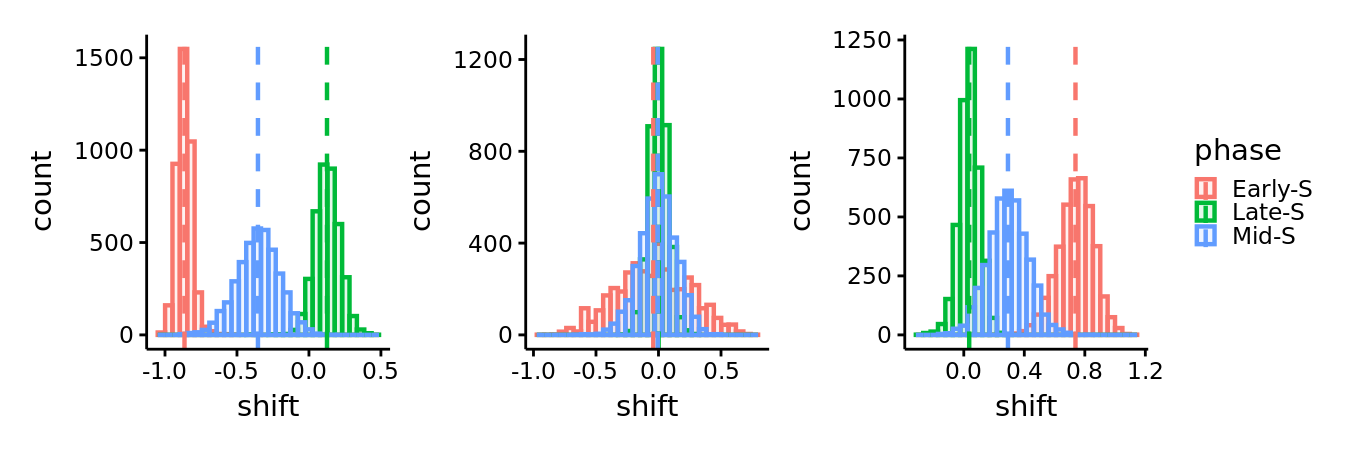

In [20]:
options(repr.plot.width=4.5,repr.plot.height=1.5,repr.plot.res=300)
p <- (b|c|a) + plot_layout(guides = 'collect')
p
p %>% ggsave(filename = "shift.pdf",width = 6,height = 2,dpi=300)

In [22]:
celltype1 <- 'celltype == "early mesoderm"'  
celltype2 <- 'celltype == "intermediate mesoderm"'
celltype3 <- 'celltype == "mix late mesenchyme"' 

early <- align_cellcycle(hires_cc,celltype1,celltype2,numPts = 30)[3][[1]]
late <- align_cellcycle(hires_cc,celltype2,celltype3,numPts = 30)[3][[1]]

plotData <- rbind(early,late %>% mutate(align = - align)) %>% ungroup() %>% filter(variable != "diff")
plotData$variable <- factor(plotData$variable, levels = rev(c("early mesoderm","intermediate mesoderm","mix late mesenchyme")))

Joining, by = "cellname"
Joining, by = "cellname"
calculate dissimilarity matrix

calculate cost and step matrices

backtracking

Joining, by = "cellname"
Joining, by = "cellname"
Joining, by = "metaNodeRef"
Joining, by = "metaNodeQuery"
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Joining, by = "cellname"
Joining, by = "cellname"
calculate dissimilarity matrix

calculate cost and step matrices

backtracking

Joining, by = "cellname"
Joining, by = "cellname"
Joining, by = "metaNodeRef"
Joining, by = "metaNodeQuery"
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


Warning message:
“Ignoring unknown aesthetics: width”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


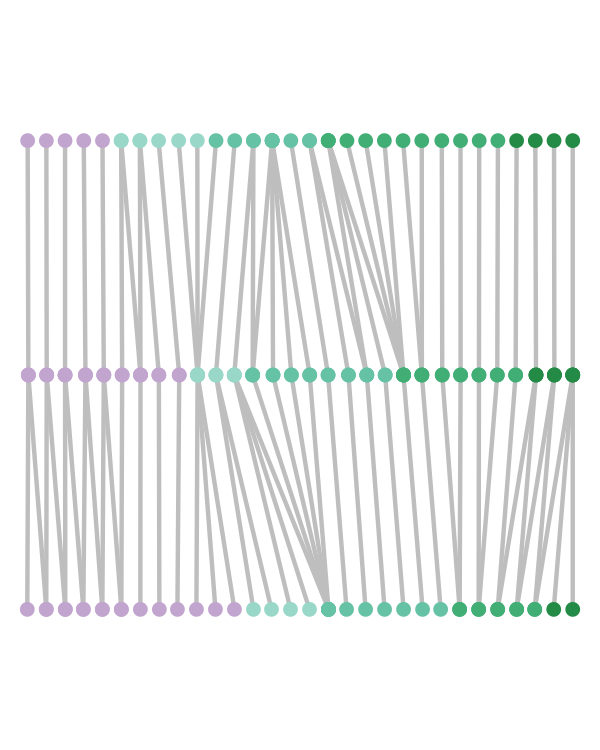

In [24]:
options(repr.plot.width=2,repr.plot.height=2.5,repr.plot.res=300)
alignment_plot <- ggplot(plotData %>% filter(variable != "diff"), aes(x = variable, y = value, group = align)) + 
            geom_line(color = "grey",aes(width = 0.05)) + theme_bw() + geom_point(aes(color = cellcycle),size = 1) + 
            coord_flip() + theme_Publication() + NoLegend() + scale_color_manual(values = cellcyclecolors)+
            xlab("") + ylab("cellcycle")
alignment_plot <- alignment_plot + theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()
            )+ theme_void() + NoLegend() + xlab("") + ylab("")
alignment_plot
alignment_plot%>% ggsave(filename = "align.meso.pdf",height = 2,width = 3,dpi = 300, units = "in") 

In [25]:
registerDoParallel(100)
middle_shift <- foreach(i = seq(1:4000),.combine = "c",.errorhandling = "remove") %dopar% {
     out <- align_cellcycle(hires_cc,'celltype!= "sample1" & celltype == "intermediate mesoderm"','celltype!= "sample2" & celltype == "intermediate mesoderm"',sample_number=200)
     out[2][[1]][[1]]
 }
early_shift <- foreach(i = seq(1:4000),.combine = "c",.errorhandling = "remove") %dopar% {
    out <- align_cellcycle(hires_cc,'celltype == "early mesoderm"','celltype == "intermediate mesoderm"',sample_number=200)
    out[2][[1]][[1]]
}
late_shift <- foreach(i = seq(1:4000),.combine = "c",.errorhandling = "remove") %dopar% {
    out <- align_cellcycle(hires_cc,'celltype == "mix late mesenchyme"','celltype == "intermediate mesoderm"',sample_number=200)
    out[2][[1]][[1]]
}

a <- middle_shift %>% as.data.frame() %>% mutate(type = "IM vs. IM")
b <- early_shift %>% as.data.frame() %>% mutate(type = "EM vs. IM")
c <- late_shift %>% as.data.frame() %>% mutate(type = "MLM vs. IM")
neural_shift <- rbind(a,b,c)
names(neural_shift) <- c("shift","type")

In [26]:
p1 <- neural_shift %>% gghistogram(x="shift",bins= 30,fill = "type",color= "type",alpha = 0.1,add="mean") + 
    theme_Publication() + theme(legend.position = "right", legend.direction = "vertical")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


In [27]:
registerDoParallel(100)
middle_shift <- foreach(i = seq(1:4000),.combine = "c",.errorhandling = "remove") %dopar% {
     out <- align_cellcycle(hires_cc,'celltype!= "sample1" & celltype == "neural tube"','celltype!= "sample2" & celltype == "neural tube"',sample_number=200)
     out[2][[1]][[1]]
 }
early_shift <- foreach(i = seq(1:4000),.combine = "c",.errorhandling = "remove") %dopar% {
    out <- align_cellcycle(hires_cc,'celltype == "neural ectoderm"','celltype == "neural tube"',sample_number=200)
    out[2][[1]][[1]]
}
late_shift <- foreach(i = seq(1:4000),.combine = "c",.errorhandling = "remove") %dopar% {
    out <- align_cellcycle(hires_cc,'celltype == "radial glias"','celltype == "neural tube"',sample_number=200)
    out[2][[1]][[1]]
}

a <- middle_shift %>% as.data.frame() %>% mutate(type = "NT vs. NT")
b <- early_shift %>% as.data.frame() %>% mutate(type = "NE vs. NT")
c <- late_shift %>% as.data.frame() %>% mutate(type = "RG vs. NT")
neural_shift <- rbind(a,b,c)
names(neural_shift) <- c("shift","type")

In [28]:
p2 <- neural_shift %>% gghistogram(x="shift",bins= 30,fill = "type",color= "type",alpha = 0.1,add="mean") + 
    theme_Publication() + theme(legend.position = "right", legend.direction = "vertical")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


In [21]:
library(patchwork)

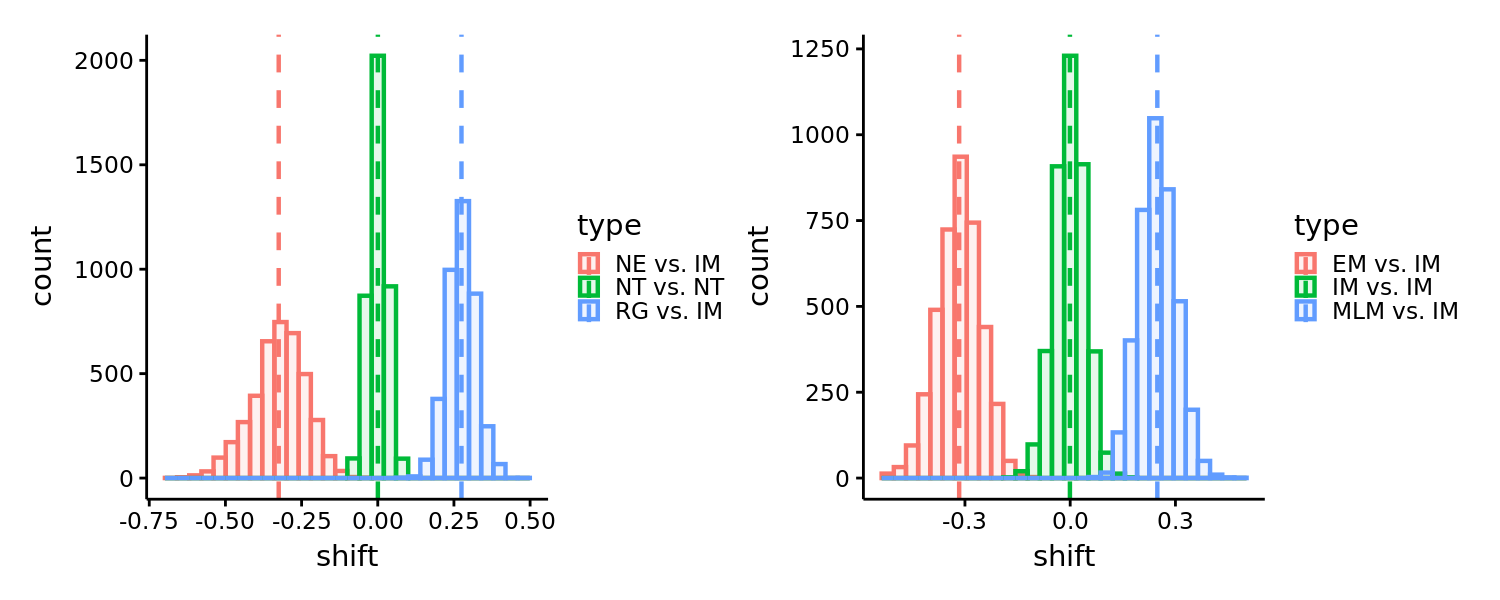

In [33]:
p <- (p2 | p1) #+ plot_layout(guides = 'collect')
p
p %>% ggsave(filename = "shift.celltype.pdf",width = 6,height = 2,dpi=300)

# traditionary plot

In [35]:
mc_hires <- readRDS("../../../figure3_related_new/di_new_emb/hires_emb_metacell.rds")

In [36]:
mc_hires

An object of class Seurat 
664361 features across 154 samples within 3 assays 
Active assay: gadis (2548 features, 0 variable features)
 2 other assays present: mc_di, mc_sct
 6 dimensional reductions calculated: mcdi_pca, mcdi_umap, mcsct_pca, mcsct_umap, gadi_pca, gadi_umap

In [42]:
ectoderm <- subset(mc_hires,subset = celltype %in% c("epiblast and PS","neural ectoderm","neural tube","radial glias","notochord","oligodendrocytes and progenitors","early neurons"))
mesoderm <- subset(mc_hires,subset = celltype %in% c("epiblast and PS","early mesenchyme","myocytes","ExE mesoderm","early mesoderm","intermediate mesoderm","mix late mesenchyme"))

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mcsct_pca_ to mcsctpca_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mcsct_umap_ to mcsctumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from gadi_pca_ to gadipca_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from gadi_umap_ to gadiumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mcsct_pca_ to mcsctpca_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mcsct_umap_ to mcsctumap_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from gadi_pca_ to gadipca_”
Warning message:
“Keys should be o

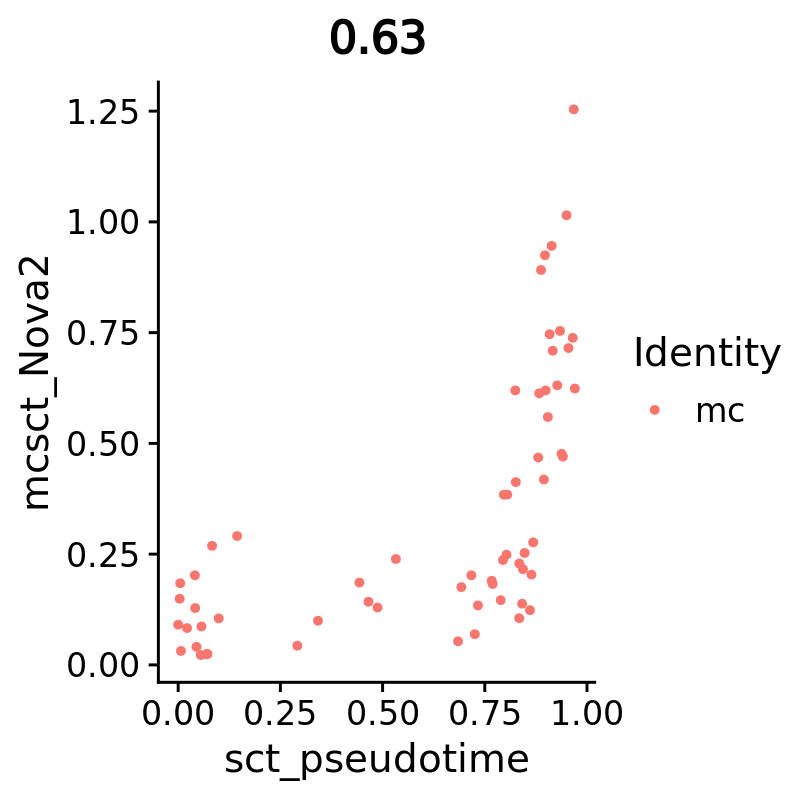

In [43]:
options(repr.plot.width=4,repr.plot.height=4,repr.plot.res=200)
FeatureScatter(ectoderm,"sct_pseudotime","mcsct_Nova2")

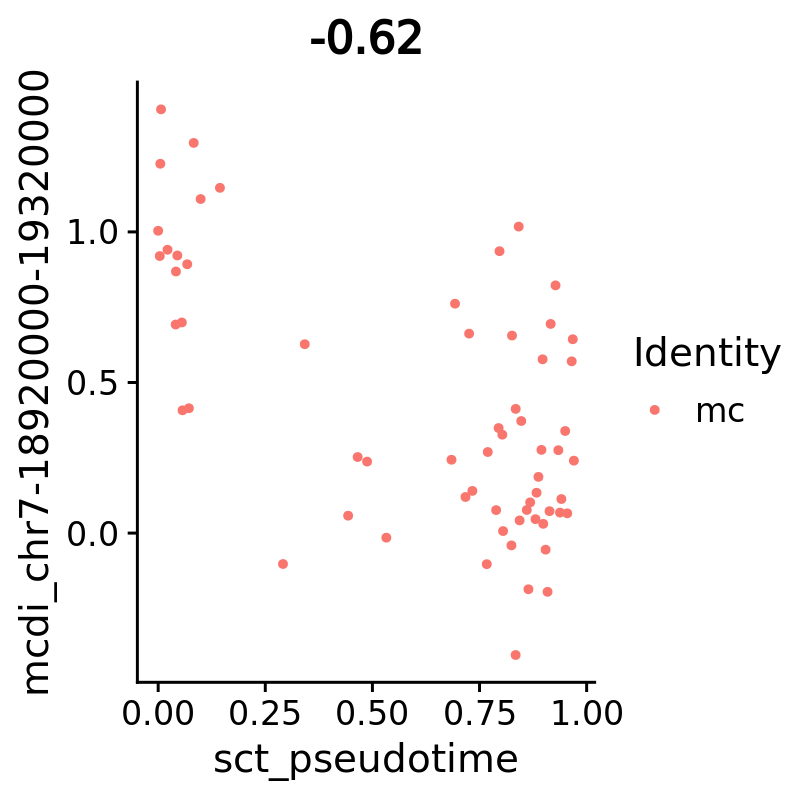

In [44]:
options(repr.plot.width=4,repr.plot.height=4,repr.plot.res=200)
FeatureScatter(ectoderm,"sct_pseudotime","mcdi_chr7-18920000-19320000")

In [50]:
ectoderm[[]]# %>% filter(sct_pseudotime < 0.6)

,mc_id,orig.ident,celltype,nCount_mc_sct,nFeature_mc_sct,nCount_gadis,nFeature_gadis,di_pseudotime,sct_pseudotime,nCount_mc_di,nFeature_mc_di
,<chr>,<fct>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
mc_106,mc_106,mc,radial glias,3218.577,14237,-18.3567833,1223,0.95075456,0.898757408,NA,NA
mc_107,mc_107,mc,early neurons,3327.162,14320,-26.7038257,1175,0.91807279,0.887552282,NA,NA
mc_108,mc_108,mc,early neurons,3206.262,13627,-7.2000170,1206,0.95202181,0.904218311,NA,NA
mc_11,mc_11,mc,radial glias,3347.316,16881,-121.4395727,1026,0.88794151,0.864094184,NA,NA
mc_115,mc_115,mc,neural ectoderm,4100.668,15399,-9.1559940,1285,0.02992998,0.044715868,NA,NA
mc_117,mc_117,mc,early neurons,3324.821,14415,47.5181398,1268,0.88229760,0.897143870,NA,NA
mc_118,mc_118,mc,radial glias,3378.275,12959,-98.7455535,1085,0.82999877,0.834179696,NA,NA
mc_12,mc_12,mc,epiblast and PS,3977.497,17574,67.9064690,1401,0.00000000,0.000000000,NA,NA
mc_121,mc_121,mc,neural ectoderm,3938.312,14959,-11.1225695,1303,0.05428973,0.056905241,NA,NA


Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”


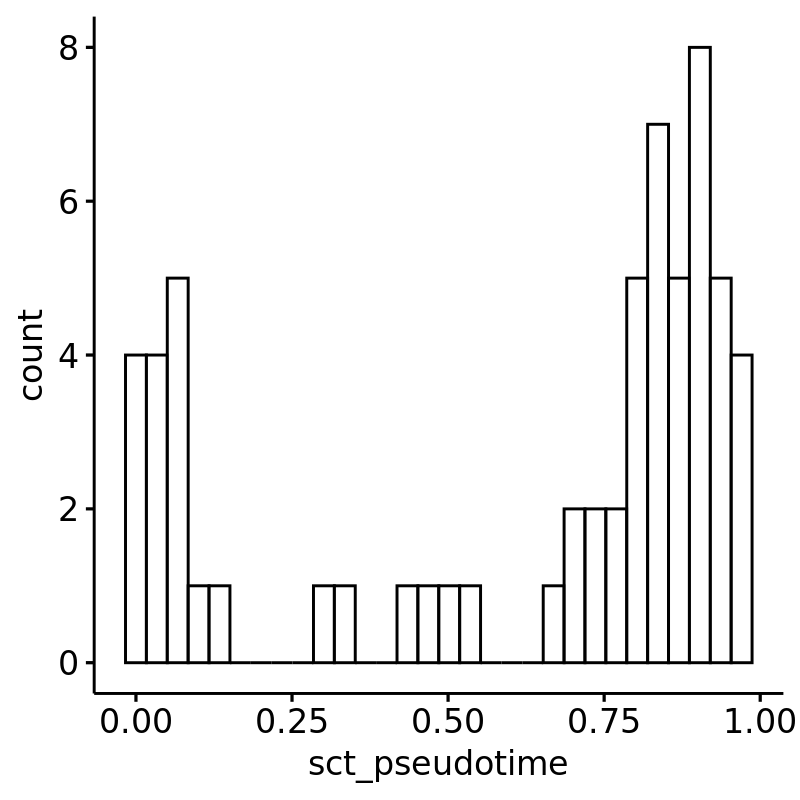

In [46]:
ectoderm[[]] %>% select(sct_pseudotime) %>% gghistogram(x="sct_pseudotime")